## Linear Regression

This notebook was created while trying out the lab exercises from the book *"Introduction to Statistical Learning"* (a.k.a. ISLR) by Gareth James et al.

The book goes through the lab exercises in R, but I am trying to run them in Python in this notebook. The data used is from a R package called 'MASS'. Since this package was not accessible directly from Python, I extracted the data as a CSV file using RStudio and imported into this notebook.

In [192]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

# setup seaborn
sns.set_style('whitegrid')
sns.set_palette('RdBu')

# setup notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Part I: Simple Regression

In [196]:
# Import data
boston_data = pd.read_csv('Boston.csv', index_col=0)

# Briefly explore the data
boston_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [193]:
boston_data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [194]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 79.3 KB


### Visualizing a least squares fit between response and preditor variables: mdev ~ lstat

(0, 52.677755430568986)

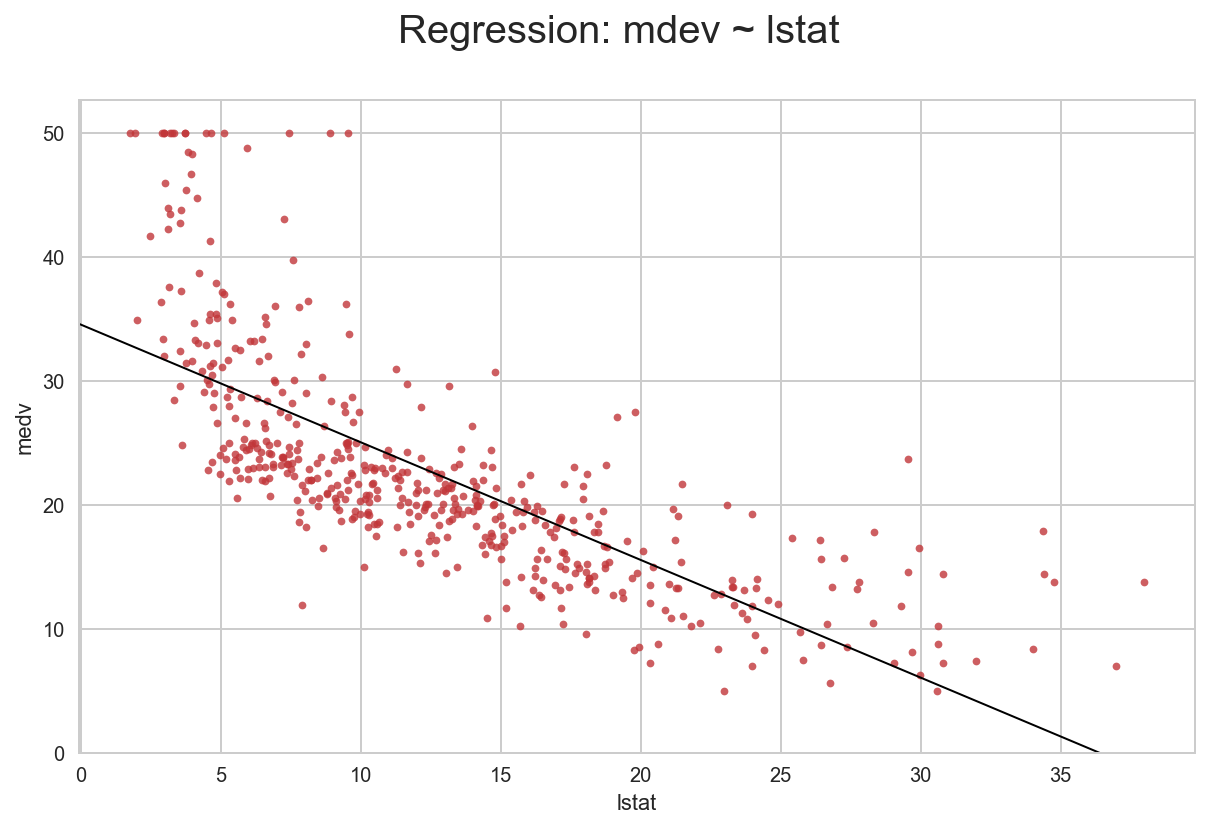

In [173]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: mdev ~ lstat', fontsize=20)
sns.regplot(data=boston_data, x='lstat', y='medv', 
            order=1, 
            ci=None,
            scatter_kws={'s':15}, 
            line_kws={'color':'k', 'linewidth': 1})
plt.ylim(ymin=0)

### Also take a look at the residual plot

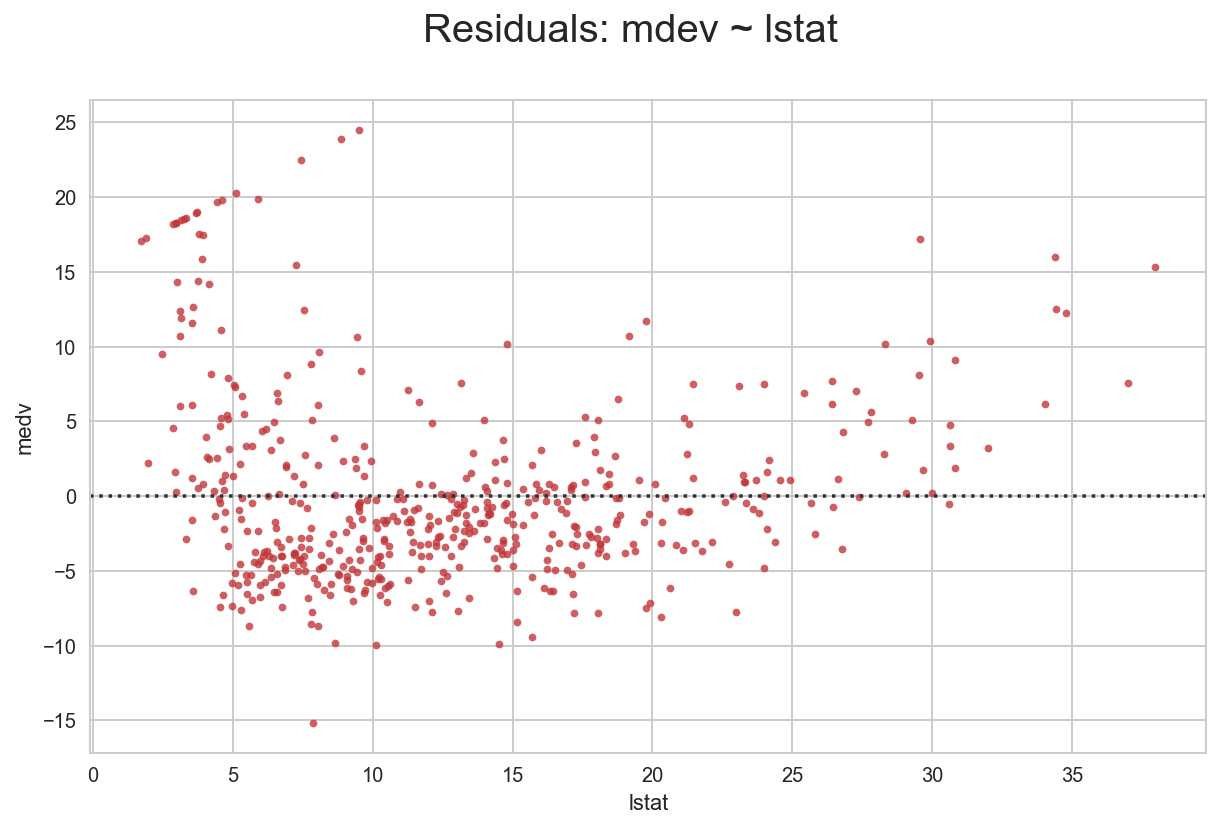

In [180]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('Residuals: mdev ~ lstat', fontsize=20)
sns.residplot(data=boston_data, x='lstat', y='medv',
              scatter_kws={'s':15},
              line_kws={'color':'k', 'linewidth': 1})

### Next, analyze the regression coefficients

In [153]:
# Regression coefficients (Oridinary Least Squares)
lm = skl_lm.LinearRegression()

X = boston_data.lstat.values.reshape(-1, 1)
y = boston_data.medv

lm.fit(X, y)
print(lm.intercept_)
print(lm.coef_)

34.5538408794
[-0.95004935]


### Summary statistics (Statsmodels)

In [109]:
est = smf.ols('medv ~ lstat', boston_data).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 03 Oct 2017   Prob (F-statistic):           5.08e-88
Time:                        00:27:45   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Training the Model

In [88]:
from sklearn.model_selection import train_test_split

### Create and Train the model

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [155]:
lm2 = skl_lm.LinearRegression()

In [156]:
lm2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Evaluate the model

In [157]:
print(lm2.intercept_)
print(lm2.coef_)

33.9994223593
[-0.94396182]


### Predictions of the model

In [158]:
predictions = lm2.predict(X_test)

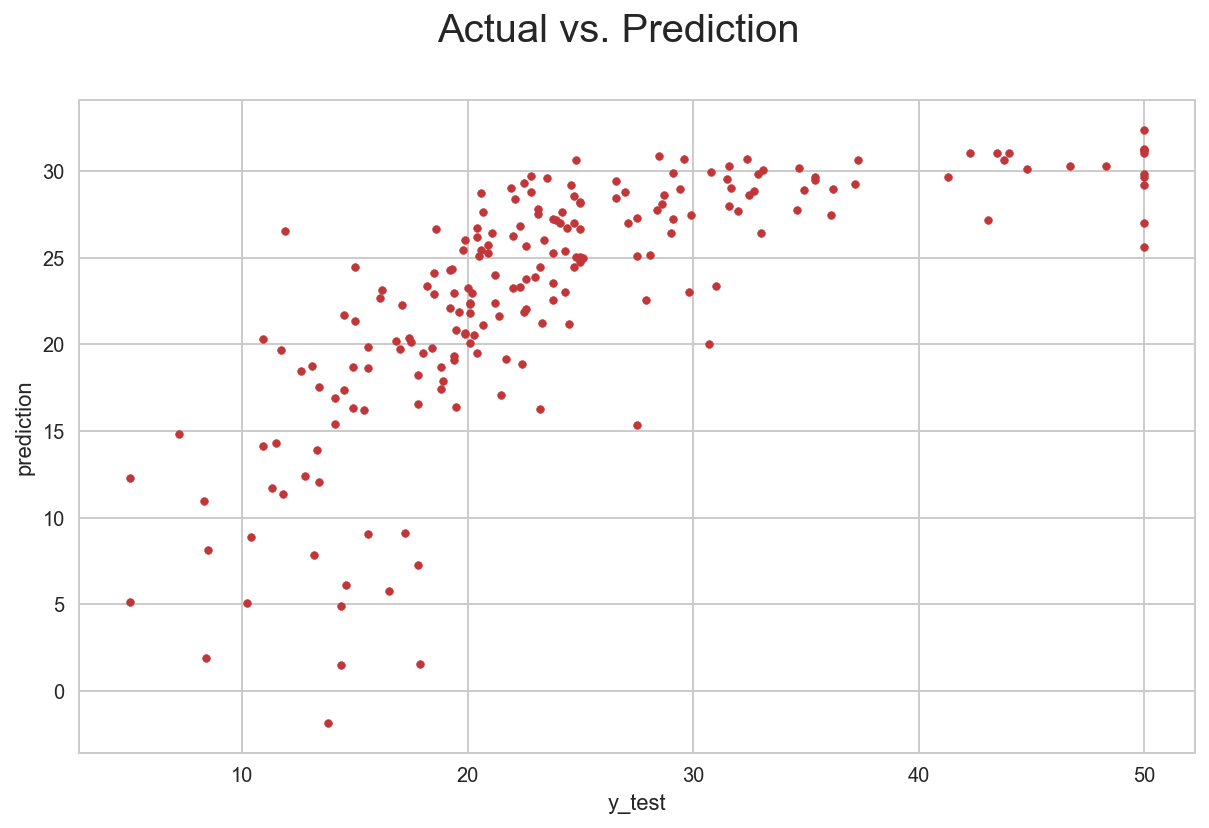

In [185]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('Actual vs. Prediction', fontsize=20)
plt.scatter(y_test, predictions, s=15)
plt.xlabel("y_test")
plt.ylabel("prediction")

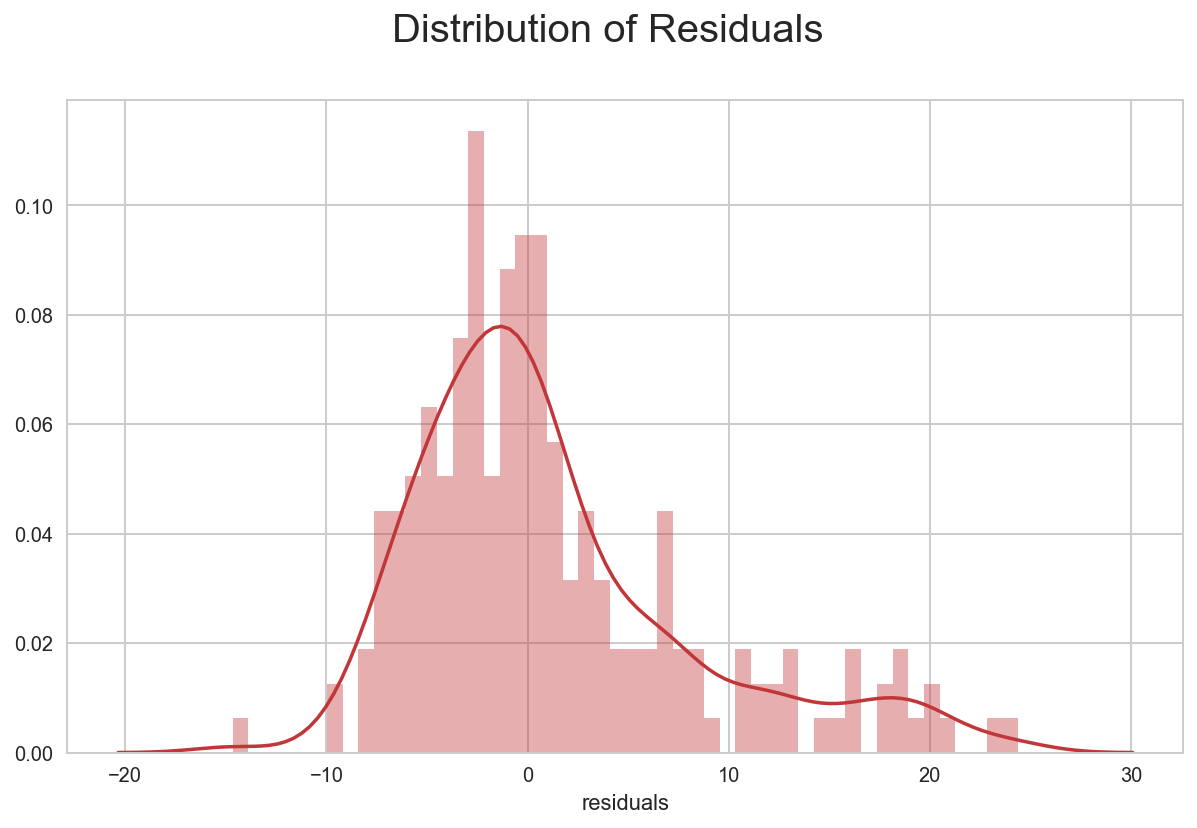

In [187]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('Distribution of Residuals', fontsize=20)
sns.distplot((y_test-predictions),bins=50, axlabel='residuals');

### Evaulating regression metrics

In [112]:
from sklearn import metrics

In [191]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5.08729643189
MSE: 51.5103925286
RMSE: 7.17707409246


---
### References:

ISLR-python: http://nbviewer.jupyter.org/github/JWarmenhoven/ISL-python/blob/master/Notebooks/Chapter%203.ipynb